## High-Frequency Trading Data Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load and Preprocess Data

In [15]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']

def load_and_preprocess_data(symbol):
    data = pd.read_csv(f'../data/{symbol}_intraday.csv')
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data['close_normalized'] = (data['4. close'] - data['4. close'].mean()) / data['4. close'].std()
    data['close_lagged_1'] = data['4. close'].shift(1)
    data['close_lagged_2'] = data['4. close'].shift(2)
    data['close_lagged_3'] = data['4. close'].shift(3)
    data.dropna(inplace=True)
    return data

combined_data = pd.DataFrame()
for symbol in symbols:
    data = load_and_preprocess_data(symbol)
    data['symbol'] = symbol
    combined_data = pd.concat([combined_data, data])

combined_data = combined_data.sort_values(by='date')

# Save combined data
combined_data.to_csv('../data/combined_data.csv')

### Visualize Normalized Data

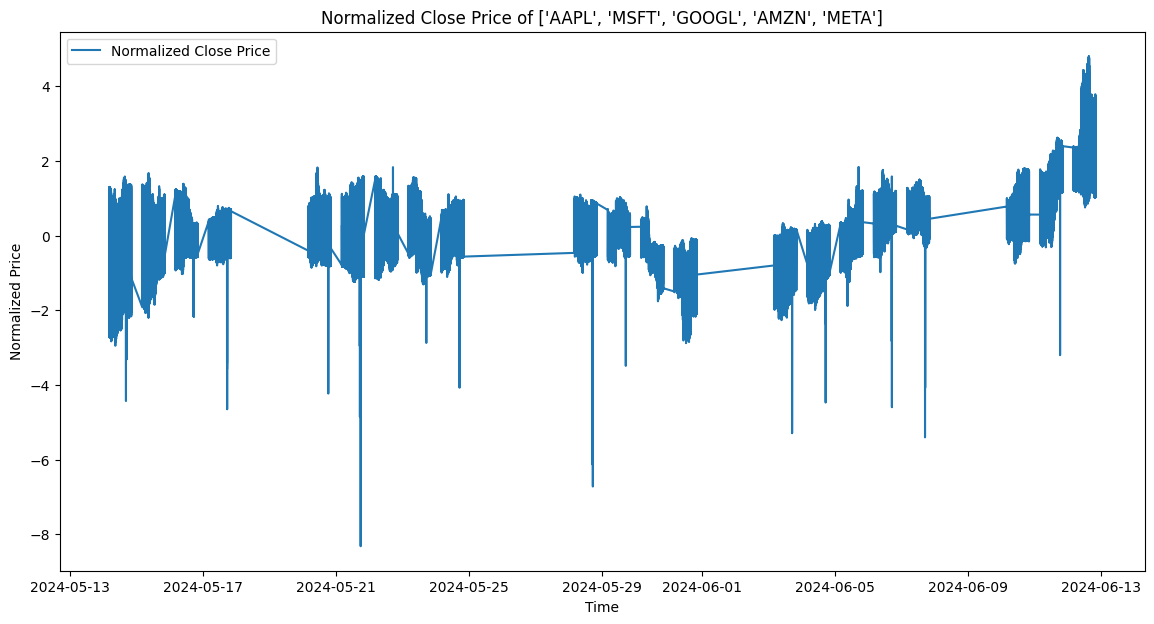

In [17]:
# Plot the normalized closing prices
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['close_normalized'], label='Normalized Close Price')
plt.title(f'Normalized Close Price of {([symbol for symbol in symbols])}')
plt.xlabel('Time')
plt.ylabel('Normalized Price')  
plt.legend()
plt.show()